In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/sc/satapps/satappsgithub/ard-workflows')

In [2]:
import geopandas as gpd
from shapely.geometry import Polygon
from shapely import wkt
from shapely import wkb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches
#from sentinelsat import SentinelAPI
import pandas as pd
from datetime import datetime
from datetime import date
import glob
from collections import OrderedDict
import os
import csv
import random

import numpy as np

import requests
import json
import getpass

#from utils.prepS2 import *
#from utils.utils import reproject_wkt_4326_3460


# Landsat Query & Order

This section finds the landsat scenes for order based  on shapefiles - in the case of FIJI orders required were already in a csv so this section is commented out.

## Prep AoI Vectors and Ancillary datasets
- single or directory of shapefiles (anything readable by gpd)
- global sentinel-2 tile shapefile
- global landsat tile shapefile
- world borders shapefile (from TM_WORLD_BORDERS)

In [3]:
# Load all aois
# aois_dir = "../DY/"
# aois = [gpd.read_file(x) for x in glob.glob(aois_dir + '*.geojson')] # load aois
# aois = gpd.GeoDataFrame(pd.concat(aois)) # spatial join aois
#aois = gpd.read_file('/home/sc/satapps/satappsgithub/anchillarydatasets/mainislanddiss.geojson')

In [4]:
# Load landsat & sentinel-2 world tiles
# world_s2_granules = gpd.read_file('../Ancillary_Datasets/sentinel2_tiles_world/sentinel2_tiles_world.shp')
#world_ls_granules = gpd.read_file('../../ancillarydatasets/WRS2_descending_0/WRS2_descending.shp') # https://www.usgs.gov/land-resources/nli/landsat/landsat-shapefiles-and-kml-files
#world_ls_granules = gpd.read_file('/home/sc/satapps/satappsgithub/anchillarydatasets/WRS2_descending_0')

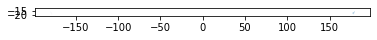

In [5]:
#world_borders = gpd.read_file('/home/sc/satapps/satappsgithub/anchillarydatasets/TM_WORLD_BORDERS-0.3/TM_WORLD_BORDERS-0.3.shp')
#country_name = 'Fiji'
#country = world_borders.loc[world_borders.NAME == country_name]
#country.plot();

## Determine overlaping tiles & plot along with AoI and country border(s)

In [6]:
# Check column NAME exists within aoi(s) gpd
#aois['NAME'] = 'FIJI'
#aois

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,NAME
0,77,FJI,Fiji,1,Central,Division,Division,None,None,"MULTIPOLYGON (((177.64661 -18.51458, 177.64690...",FIJI


In [7]:
# Create bool for intersection between any tiles 
#for n, g in zip(country.NAME, country.geometry):
#    world_ls_granules[n] = world_ls_granules.geometry.apply(lambda x: gpd.GeoSeries(x).intersects(g))
#     world_s2_granules[n] = world_s2_granules.geometry.apply(lambda x: gpd.GeoSeries(x).intersects(g))

In [8]:
# Filter based on any True intersections
#world_ls_granules[country_name] = world_ls_granules[world_ls_granules[country.NAME.values]].any(1)
#country_ls_grans = world_ls_granules[world_ls_granules[country_name]==True]
# world_s2_granules[country_name] = world_s2_granules[world_s2_granules[country.NAME.values]].any(1)
# country_s2_grans = world_s2_granules[world_s2_granules[country_name]==True]

In [9]:
# # bonus filter for aoi subset within country
# country_s2_grans['AOI'] = country_s2_grans.geometry.apply(lambda x: gpd.GeoSeries(x).intersects(aois))
# aois_s2_grans = country_s2_grans[country_s2_grans.AOI==True]
#country_ls_grans['AOI'] = country_ls_grans.geometry.apply(lambda x: gpd.GeoSeries(x).intersects(aois))
#aois_ls_grans = country_ls_grans[country_ls_grans.AOI==True]

/home/sc/miniconda3/envs/satappsARD/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
# Plot coverage
#fig, ax = plt.subplots(figsize=(10,10),dpi=100)
#fig.autofmt_xdate()
#leg_patches=[]

#country.plot(facecolor="g", edgecolor='g', ax=ax, alpha=0.2);
#leg_patches.append(mpatches.Patch(facecolor="g", edgecolor='g', alpha=0.25, lw=0.7, label=country_name))

# country_s2_grans.plot(facecolor="none", edgecolor='r', lw=0.7, ax=ax)
# leg_patches.append(mpatches.Patch(facecolor="none", edgecolor='r', lw=0.7, label='Sentinel-2 Tiles'))
# country_s2_grans.apply(lambda x: ax.annotate(s=x.Name, xy=x.geometry.centroid.coords[0], ha='center', fontsize=6),axis=1)

# aois_s2_grans.plot(facecolor="none", edgecolor='b', lw=0.7, ax=ax)
# leg_patches.append(mpatches.Patch(facecolor="none", edgecolor='r', lw=0.7, label='Landsat Tiles'))
# aois_s2_grans.apply(lambda x: ax.annotate(s=x.PR, xy=x.geometry.centroid.coords[0], ha='center', fontsize=6),axis=1)

# country_ls_grans.plot(facecolor="none", edgecolor='b', lw=0.7, ax=ax)
# leg_patches.append(mpatches.Patch(facecolor="none", edgecolor='r', lw=0.7, label='Landsat Tiles'))
# country_ls_grans.apply(lambda x: ax.annotate(s=x.PR, xy=x.geometry.centroid.coords[0], ha='center', fontsize=6),axis=1)

#aois_ls_grans.plot(facecolor="none", edgecolor='b', lw=0.7, ax=ax)
#leg_patches.append(mpatches.Patch(facecolor="none", edgecolor='b', lw=0.7, label='Landsat Tiles'))
#aois_ls_grans.apply(lambda x: ax.annotate(s=x.PR, xy=x.geometry.centroid.coords[0], ha='center', fontsize=6),axis=1)

#ax.set_title('asf')
#ax.legend(handles=leg_patches, loc='upper center', shadow=True, ncol=5);
#ax.grid(alpha=0.5);
#ax.tick_params(axis='y', rotation=90);
#ax.tick_params(axis='x', rotation=0);

# Landsat Order

In [3]:
#pr = aois_ls_grans
df = pd.read_csv('../../anchillarydatasets/fiji_landsat8.csv') # latest csv can be found at - https://www.usgs.gov/land-resources/nli/landsat/bulk-metadata-service
#df = df[df.row.isin(pr.ROW.values)&df.path.isin(pr.PATH.values)]
res = df

In [4]:
res['AcquisitionDate'] = pd.to_datetime(res['acquisitionDate'], format='%Y-%m-%d')
#res5 = res3[(res3.AcquisitionDate>date(2016,1,1)) & (res3.AcquisitionDate<date(2016,5,1))] # SET TIME PERIOD
res = res[(res.AcquisitionDate>date(2016,2,1)) & (res.AcquisitionDate<date(2016,2,20))] # SET TIME PERIOD

/home/sc/miniconda3/envs/satappsARD/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
print(len(res))

18


In [6]:
res.LANDSAT_PRODUCT_ID.head(20)

1550    LC08_L1GT_073069_20160215_20170329_01_T2
1551    LC08_L1TP_073071_20160215_20170329_01_T1
1552    LC08_L1TP_073072_20160215_20170329_01_T2
1553    LC08_L1GT_073073_20160215_20170329_01_T2
1554    LC08_L1GT_075069_20160213_20180202_01_T2
1555    LC08_L1TP_075071_20160213_20180202_01_T2
1556    LC08_L1TP_075072_20160213_20180202_01_T1
1557    LC08_L1TP_075073_20160213_20180202_01_T1
1558    LC08_L1GT_072069_20160208_20170330_01_T2
1559    LC08_L1GT_072071_20160208_20170330_01_T2
1560    LC08_L1TP_072072_20160208_20170330_01_T2
1561    LC08_L1TP_072073_20160208_20170330_01_T1
1562    LC08_L1GT_072074_20160208_20170330_01_T2
1563    LC08_L1GT_074069_20160206_20170330_01_T2
1564    LC08_L1TP_074071_20160206_20170330_01_T1
1565    LC08_L1TP_074072_20160206_20170330_01_T1
1566    LC08_L1TP_074073_20160206_20170330_01_T1
1567    LC08_L1GT_076069_20160204_20170330_01_T2
Name: LANDSAT_PRODUCT_ID, dtype: object

In [7]:
print(len(res))

18


In [8]:
#res5.LANDSAT_PRODUCT_ID.head(20)

In [9]:
l8_list = list(res.LANDSAT_PRODUCT_ID.values)
#print(l8_list)

In [10]:
# function for basic interaction with ESPA API - hacked together from their 'how to page'
def espa_api(endpoint, verb='get', body=None, uauth=None):
    """ Suggested simple way to interact with the ESPA JSON REST API """
    auth_tup = uauth if uauth else (username, password)
    response = getattr(requests, verb)(host + endpoint, auth=auth_tup, json=body)
    print('{} {}'.format(response.status_code, response.reason))
    data = response.json()
    if isinstance(data, dict):
        messages = data.pop("messages", None)  
        if messages:
            print(json.dumps(messages, indent=4))
    try:
        response.raise_for_status()
    except Exception as e:
        print(e)
        return None
    else:
        return data

In [11]:
# earth explorer credentials are required
host = 'https://espa.cr.usgs.gov/api/v1/'
#username = 'tom.jones'
#password = 'Welcome12'
username = 'sarah.cheesbrough'
password = 'SaCh_SatApps_USGS1'
# check login
print('GET /api/v1/user')
resp = espa_api('user')
print(json.dumps(resp, indent=4))

GET /api/v1/user
200 OK
{
    "email": "Sarah.Cheesbrough@sa.catapult.org.uk",
    "first_name": "Sarah",
    "last_name": "Cheesbrough",
    "roles": [
        "active"
    ],
    "username": "sarah.cheesbrough"
}


In [12]:
## CHECK CONFLICTING ORDERS ###

# check for any existing orders that may prevent imediate processing of a fresh requestttttt
print('GET /api/v1/list-orders')
filters = {"status": ["complete", "ordered"]}  # Here, we ignore any purged orders
#resp = espa_api('list-orders', body=filters)
orders = espa_api('list-orders', body=filters)
print(json.dumps(orders[0], indent=4))

GET /api/v1/list-orders
200 OK
"espa-Sarah.Cheesbrough@sa.catapult.org.uk-11212019-081706-600"


In [13]:

with open ('../allorders.txt', 'a') as f:
    for orderid in orders:
        resp = espa_api('item-status/{0}'.format(orderid), body={'status': 'complete'})
        for item in resp[orderid]:
            f.write(item.get('product_dload_url') + '/n')

200 OK
200 OK
200 OK
200 OK
200 OK


In [14]:
### EXTRACT URLS ###
#orderid = 'espa-Sarah.Cheesbrough@sa.catapult.org.uk-10252019-053952-070'
for orderid in orders:
    orderid = resp[orderid]
    urls = []
    for item in resp[orderid]:
        urls.append(item.get('product_dload_url'))
    print(urls)

KeyError: 'espa-Sarah.Cheesbrough@sa.catapult.org.uk-11212019-081706-600'

In [15]:
#create txt file of url for single order
with open ('../lsTM_urls.txt', 'a') as f:
    orderurll7 = orders[0]
    print(orderurll7)
    resp = espa_api('item-status/{0}'.format(orderurll7), body={'status': 'complete'})
    for item in resp[orderurll7]:
        f.write(item.get('product_dload_url') + '/n')

espa-Sarah.Cheesbrough@sa.catapult.org.uk-11212019-081706-600
200 OK


In [16]:
### CHECK PRODUCT AVAILABILITY ###

# example of how to check available products for desired scenes
print('GET /api/v1/available-products')
avail_list = {'inputs': l8_list
             }
resp = espa_api('available-products', body=avail_list)
#print(json.dumps(resp, indent=4))

GET /api/v1/available-products
200 OK


In [17]:
#remove any products which are not working
l8_list = list(res.LANDSAT_PRODUCT_ID.values)
print(len(l8_list))
#print(l8_list)
er = []
er = ['LC08_L1GT_075069_20150210_20170413_01_T2', 'LC08_L1GT_075071_20150210_20170413_01_T2', 'LC08_L1TP_075072_20150210_20170413_01_T1', 'LC08_L1TP_075073_20150210_20170413_01_T1']
print(len(er))
print(er)
#er = ['LC08_L1TP_166051_20190814_20190814_01_RT', 'LC08_L1TP_166048_20190814_20190814_01_RT']
ls = l8_list
#ls = [x (if x is not in er) for x in l8_list]
for i in er: 
    print(i)
    ls.remove(er)
print(len(l8_list))
print(len(er))
print(len(ls))


18
4
['LC08_L1GT_075069_20150210_20170413_01_T2', 'LC08_L1GT_075071_20150210_20170413_01_T2', 'LC08_L1TP_075072_20150210_20170413_01_T1', 'LC08_L1TP_075073_20150210_20170413_01_T1']
LC08_L1GT_075069_20150210_20170413_01_T2


ValueError: list.remove(x): x not in list

In [18]:
ert = []
#er = ['LC08_L1TP_166051_20190814_20190814_01_RT', 'LC08_L1TP_166048_20190814_20190814_01_RT']
l8_lst = [e for e in l8_list if e not in (er)]
print(len(l8_lst))
l8_lst = [i for i in l8_list if 'RT' not in i]
print(len(l8_lst))
l8_lst = [i for i in l8_lst if '20150210' not in i]
print(len(l8_lst))

18
18
18


In [19]:
### CREATE ORDER ###
# if any further subsetting is required. very recently acquired products are categorised as RT (as opposed to T1/T2). these are of insufficient certainty RE quality to be processed to ARD. this latency is unlikely to impact the non-NRT requirements of Common Sensing.
er = []
#er = ['LC08_L1TP_166051_20190814_20190814_01_RT', 'LC08_L1TP_166048_20190814_20190814_01_RT']
l8_ls = [e for e in l8_list if e not in (er)]
l8_ls = [i for i in l8_list if 'RT' not in i]
l8_ls = [i for i in l8_ls if '20150210' not in i]

# specifying differing products across the sensors
#l8_prods = ["sr","bt","source_metadata","sr_ndvi","sr_evi","sr_savi","sr_msavi","sr_ndmi","sr_nbr","sr_nbr2","stats","pixel_qa"]
l8_prods = ["sr","bt","source_metadata","stats","pixel_qa"]
         
# determine available-products under their respective sensors
ls = l8_ls
#print('GET /api/v1/available-products')
order = espa_api('available-products', body=dict(inputs=ls))
#print(json.dumps(order, indent=4))

# replace available products with what we wish to process
for sensor in order.keys():
    if isinstance(order[sensor], dict) and order[sensor].get('inputs'):

        if set(l8_ls) & set(order[sensor]['inputs']):
            order[sensor]['products'] = l8_prods

# Add in the rest of the order information
#order['projection'] = projection
order['format'] = 'gtiff'
order['resampling_method'] = 'cc'
order['note'] = 'L8 20131201-20150101'

# the order shoud now have changed from the original call available-products
#print(json.dumps(order, indent=4))

200 OK


In [20]:
### PLACE ORDER ###
print('POST /api/v1/order')
resp = espa_api('order', verb='post', body=order)
print(resp.keys)
print(json.dumps(resp, indent=4))

POST /api/v1/order
201 CREATED
<built-in method keys of dict object at 0x7f544228ec18>
{
    "orderid": "espa-Sarah.Cheesbrough@sa.catapult.org.uk-11212019-081940-806",
    "status": "ordered"
}


In [21]:
### CHECK STATUS OF ORDER ### 
orderid = resp['orderid']
print('GET /api/v1/order-status/{}'.format(orderid))
resp = espa_api('order-status/{}'.format(orderid))
print(json.dumps(resp, indent=4))

GET /api/v1/order-status/espa-Sarah.Cheesbrough@sa.catapult.org.uk-11212019-081940-806
200 OK
{
    "orderid": "espa-Sarah.Cheesbrough@sa.catapult.org.uk-11212019-081940-806",
    "status": "ordered"
}
